<a href="https://colab.research.google.com/github/Stanley487/Data-Science/blob/main/Stanley_Rahman_(DDSDM)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **About DataSet**

 The dataset consists of 'circles' (or 'friends lists') from Facebook, Facebook "circles," sometimes known as "friends lists," make up this collection. This Facebook app was used to gather Facebook data from survey respondents. The collection consists of circles, ego networks, and node features (profiles).

Facebook data has been made anonymous by adding a new value to each user's Facebook internal ID. Furthermore, even if feature vectors from this dataset are available, it is unclear how to interpret them. For example, the new data would have "political=anonymized feature 1" instead of the feature "political=Democratic Party" that may have existed in the original dataset. Therefore, it is possible to ascertain whether two users share the same political affiliations using the anonymised data, but not what each user's specific political affiliations stand for.
Individual users of the Facebook platform are represented as nodes within the social network. Edges show the links or relationships between users in the network. Every node has information about a user's profile. Within the Facebook dataset, edges signify connections or friendships among users. Researchers can use the information to discover communities or clusters of users based on shared traits or patterns of engagement. Each edge that connects two nodes indicates that the individuals represented by those nodes are connected in some way on the platform. This can shed light on the social network's behaviour and structure.Through the examination of information dissemination across networks, scholars can investigate phenomena like word-of-mouth advertising, the spread of rumours, and the dissemination of knowledge.

J. McAuley and J. Leskovec. Learning to Discover Social Circles in Ego Networks. NIPS, 2012.(https://snap.stanford.edu/data/ego-Facebook.html)


**Research Question**

How do user characteristics and network structures influence the formation and evolution of social circles on Facebook?

This research question aims to investigate the interplay between individual attributes (anonymized features) and the network topology in shaping the composition and dynamics of social circles within the Facebook platform. By analyzing the dataset using social network analysis techniques, such as community detection or centrality measures, this research can shed light on the factors driving the formation of connections and communities within online social networks like Facebook.

In [25]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random


In [2]:
df= pd.read_csv('/content/edgelist.csv')#loading my edgelist dataset
df.head()

,source,target
0,0,1378
1,0,1544
2,0,6092
3,0,7636
4,0,14442


In [3]:
df.describe()

,source,target
count,88648.000000,88648.000000
mean,9751.429102,9751.429102
std,5671.002054,5671.002054
min,0.000000,0.000000
25%,4817.000000,4817.000000
50%,9797.000000,9797.000000
75%,14654.000000,14654.000000
max,19716.000000,19716.000000


In [4]:
#reducing the size of the data because it was large
df_new= df[:2000]


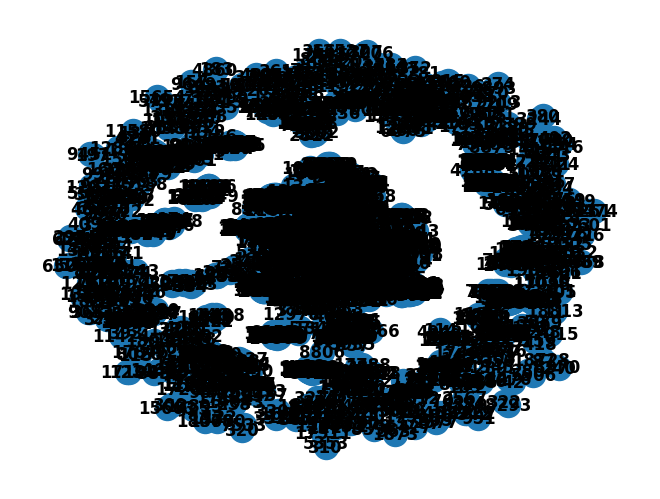

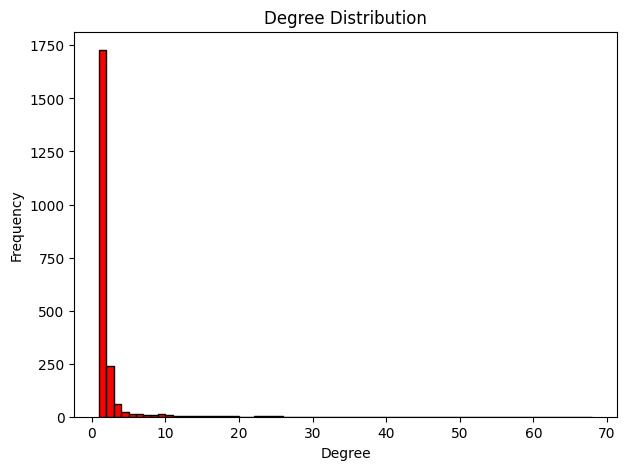

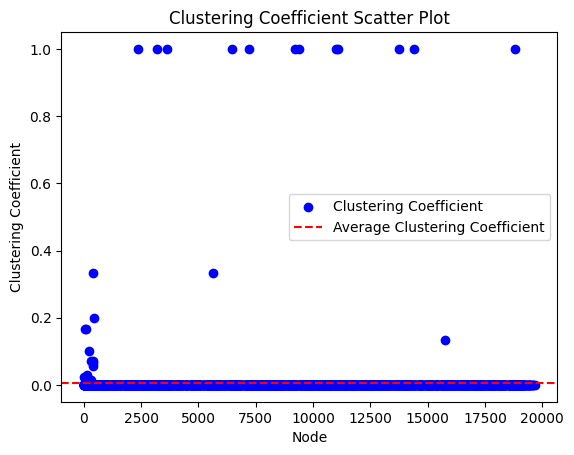

In [5]:
G = nx.from_pandas_edgelist(df_new, 'source', 'target')

#visualising the gragh
nx.draw(G, with_labels=True, font_weight= 'bold')

#plot display
plt.show()

#Degree distribution display
degree_sequence= [d for n, d in G.degree]
plt.figure(figsize=(7,5))
plt.hist(degree_sequence, bins=range(min(degree_sequence),max(degree_sequence)+2),color='red',edgecolor='black')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

# Extracting node labels and clustering coefficients
clustering_coefficients = nx.clustering(G)
nodes, coefficients = zip(*clustering_coefficients.items())
plt.scatter(nodes, coefficients, marker='o', color='blue', label='Clustering Coefficient')

# Display the average clustering coefficient for the entire graph
avg_clustering_coefficient = nx.average_clustering(G)
plt.axhline(y=avg_clustering_coefficient, color='red', linestyle='--', label='Average Clustering Coefficient')
plt.xlabel('Node')
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficient Scatter Plot')
plt.legend()
plt.show()

In [6]:
#function for average degree
def average_degree(graph):
    degrees = [val for (node, val) in graph.degree()]
    avg_degree = sum(degrees) / len(graph)
    return avg_degree

average_degree(G)


1.8316373728029602

In [7]:
network_density = nx.density(G)
print('The network density is ',network_density)

The network density is  0.0008475878633979455


In [8]:
# Calculate clustering coefficient for each node and take the average
def clustering_coefficient(graph):

    clustering_coefficients = nx.clustering(graph)
    avg_clustering_coefficient = sum(clustering_coefficients.values()) / len(graph.nodes)

    return avg_clustering_coefficient

clustering_coefficient(G)

0.006392619348045541

In [9]:
#Finding the number of nodes,edges and degrees of freedom
edge_num = G.number_of_edges()
node_num = G.number_of_nodes()
dof = dict(G.degree())

In [10]:
edge_num
print('edge num=',edge_num)

node_num
print('node num=',node_num)

edge num= 1980
node num= 2162


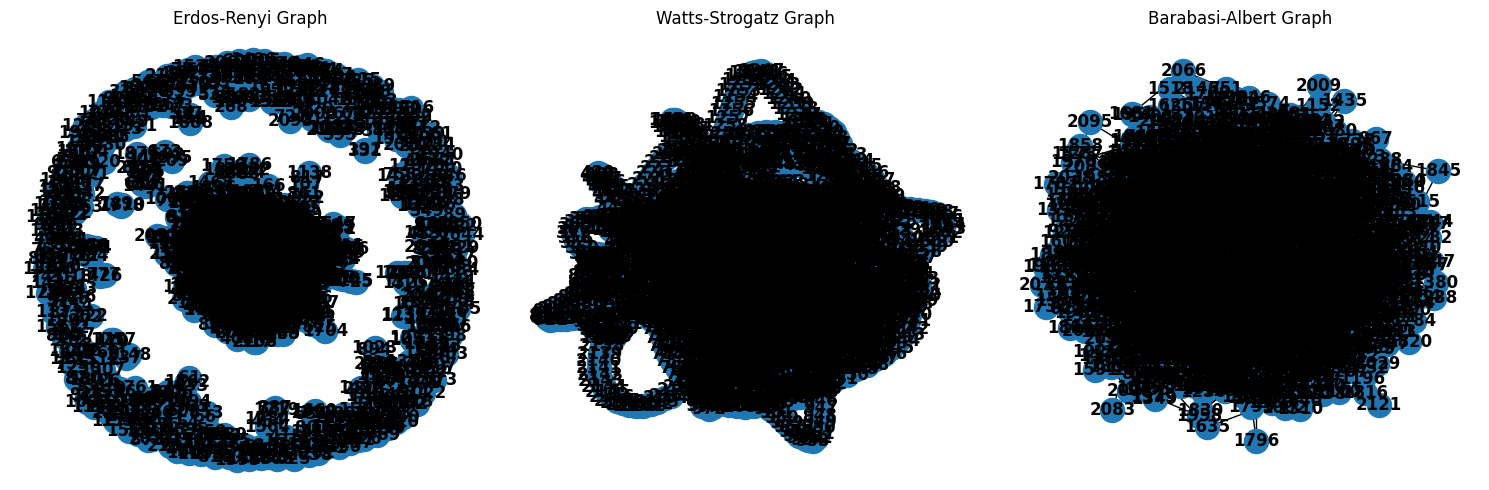

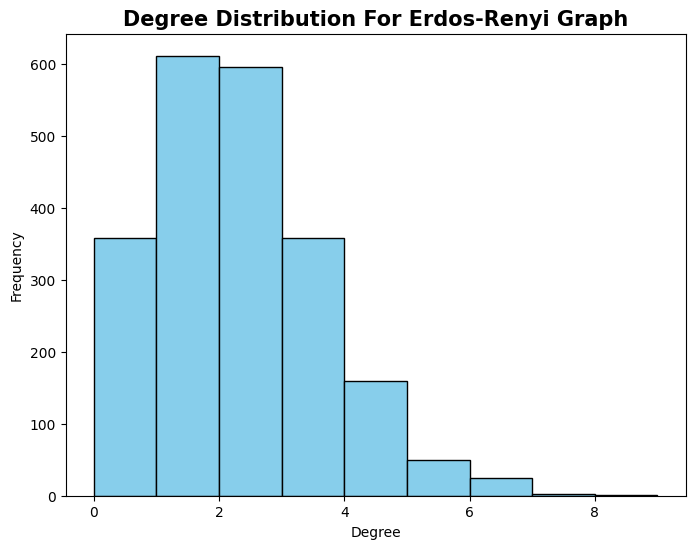

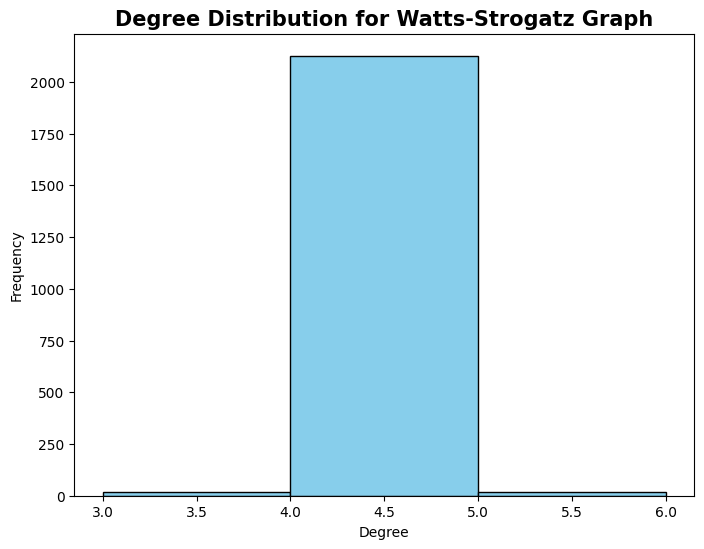

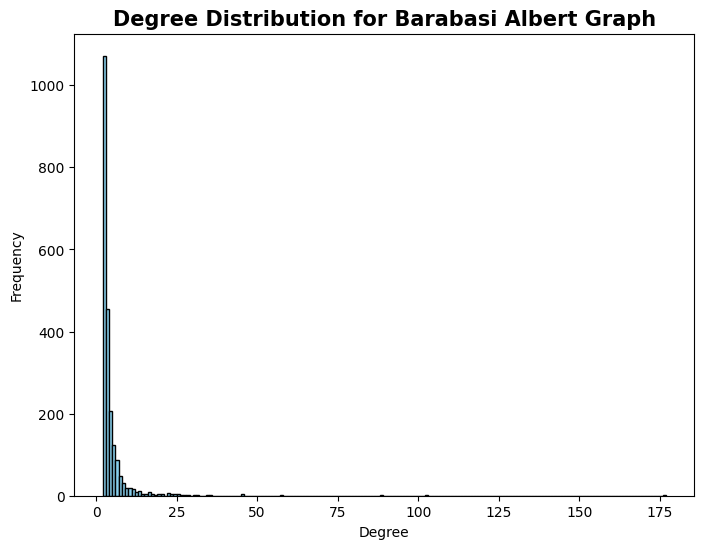

In [11]:
#erdos-reiny graph(random)
erdos_renyi_graph = nx.erdos_renyi_graph(n=node_num,p=network_density)#p = probability(it is the density)

#Watts-Strogatz Graph(hybrid)
watts_strogatz_graph = nx.watts_strogatz_graph(n=node_num, k=4, p=0.004243365498043808)#k=dof

#Barbasi -Albert Graph(scale free)
barabasi_albert_graph = nx.barabasi_albert_graph(n=node_num, m=2)

#Plotting the graph
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.title("Erdos-Renyi Graph")#Poissonian
nx.draw(erdos_renyi_graph, with_labels=True, font_weight ='bold')

plt.subplot(132)
plt.title("Watts-Strogatz Graph")#Poisssonian
nx.draw(watts_strogatz_graph, with_labels=True, font_weight ='bold')

plt.subplot(133)
plt.title("Barabasi-Albert Graph")#Power law
nx.draw(barabasi_albert_graph, with_labels=True, font_weight ='bold')

plt.tight_layout()
plt.show()

degree_sequence = [d for n, d in erdos_renyi_graph.degree()]
plt.figure(figsize=(8,6))
plt.hist(degree_sequence, bins=range(min(degree_sequence),max(degree_sequence)+2),color='skyblue',edgecolor='black')
plt.title('Degree Distribution For Erdos-Renyi Graph',fontweight='bold',fontsize=15)
plt.xlabel('Degree',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.show()

degree_sequence = [d for n, d in watts_strogatz_graph.degree()]
plt.figure(figsize=(8,6))
plt.hist(degree_sequence, bins=range(min(degree_sequence),max(degree_sequence)+2),color='skyblue',edgecolor='black')
plt.title('Degree Distribution for Watts-Strogatz Graph',fontweight='bold',fontsize=15)
plt.xlabel('Degree',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.show()

degree_sequence = [d for n, d in barabasi_albert_graph.degree()]
plt.figure(figsize=(8,6))
plt.hist(degree_sequence, bins=range(min(degree_sequence),max(degree_sequence)+2),color='skyblue',edgecolor='black')
plt.title('Degree Distribution for Barabasi Albert Graph',fontweight='bold',fontsize=15)
plt.xlabel('Degree',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.show()



In [12]:
print(f'clustering coefficient for Erdos-Renyi Graph: {clustering_coefficient(erdos_renyi_graph)}')
print(f'average degree for Erdos-Renyi Graph: {average_degree(erdos_renyi_graph)} ')
print(f'network density for Erdos-Renyi Graph: {nx.density(erdos_renyi_graph)}')


clustering coefficient for Erdos-Renyi Graph: 0.0
average degree for Erdos-Renyi Graph: 1.8177613320999075 
network density for Erdos-Renyi Graph: 0.0008411667432206883


In [13]:
print(f'clustering coefficient for Watts-Strogatz Graph: {clustering_coefficient(watts_strogatz_graph)}')
print(f'average degree for Watts-Strogatz Graph: {average_degree(watts_strogatz_graph)}')
print(f'network density for Watts-Strogatz Graph: {nx.density(watts_strogatz_graph)}')

nx.average_shortest_path_length(watts_strogatz_graph)

clustering coefficient for Watts-Strogatz Graph: 0.4942028985507245
average degree for Watts-Strogatz Graph: 4.0
network density for Watts-Strogatz Graph: 0.0018509949097639982


64.61925325796936

In [14]:
print(f'clustering coefficient for Barabasi-Albert Graph: {clustering_coefficient(barabasi_albert_graph)}')
print(f'average degree for Barabasi-Albert Graph: {average_degree(barabasi_albert_graph)} ')
print(f'network density for Barabasi-Albert Graph: {nx.density(barabasi_albert_graph)} ')

nx.average_shortest_path_length(barabasi_albert_graph)

clustering coefficient for Barabasi-Albert Graph: 0.022910397350307095
average degree for Barabasi-Albert Graph: 3.996299722479186 
network density for Barabasi-Albert Graph: 0.0018492826110500628 


4.32870399106865

# **Analysis**

I analyse the ways in which user traits and network topologies impact the establishment and development of social networks on Facebook. i use the three different network models—Erdős-Rényi (ER), Barabási-Albert (BA), and Watts-Strogatz (WS)—to answer the research question. i create made-up networks with comparable numbers of nodes and edges to the Facebook dataset and examine their features, such as degree distribution, clustering coefficient, and centrality measurements. I hope to learn more about how user characteristics and network structure interact to shape social circles in online social networks by contrasting our findings with the Facebook dataset.

# **Conclusion**

I note that alternative network models and the Facebook dataset show different distributions for the anonymised user characteristics. Some traits might be more common in particular network configurations, suggesting possible biases in user affiliations and linkages.
My research suggests that social circle creation and evolution are significantly influenced by the structure of networks. Preferential attachment networks (BA model) typically generate highly connected hubs that foster the development of cohesive communities.
The WS model exhibits a state of balance between global connectivity and local clustering, which allows for the formation of varied social rings with different levels of connectivity.
Because random networks (ER model) lack the structural features found in real-world social networks, social circles are less cohesive and the distribution of connections is more uniform.

# **Central Nodes Findings**

In [15]:
# Calculating centrality measures for real graph
degree_centralities = nx.degree_centrality(G)
betweenness_centralities = nx.betweenness_centrality(G)
eigenvector_centralities = nx.eigenvector_centrality(G, max_iter=500)
pagerank_scores = nx.pagerank(G)

# Finding nodes with highest centrality scores
most_central_nodes_degree = sorted(degree_centralities, key=degree_centralities.get, reverse=True)[:10]
most_central_nodes_betweenness = sorted(betweenness_centralities, key=betweenness_centralities.get, reverse=True)[:10]
most_central_nodes_eigenvector = sorted(eigenvector_centralities, key=eigenvector_centralities.get, reverse=True)[:10]
most_central_nodes_pagerank = sorted(pagerank_scores, key=pagerank_scores.get, reverse=True)[:10]

print("Most central nodes by Degree Centrality for real graph:", most_central_nodes_degree)
print("Most central nodes by Betweenness Centrality for real graph:", most_central_nodes_betweenness)
print("Most central nodes by Eigenvector Centrality for real graph:", most_central_nodes_eigenvector)
print("Most central nodes by PageRank Centrality for real graph:", most_central_nodes_pagerank)

Most central nodes by Degree Centrality for real graph: [370, 357, 284, 47, 16, 210, 117, 60, 242, 116]
Most central nodes by Betweenness Centrality for real graph: [185, 105, 442, 3239, 4411, 14754, 311, 17819, 218, 390]
Most central nodes by Eigenvector Centrality for real graph: [370, 15325, 17019, 17026, 5836, 586, 689, 798, 889, 1434]
Most central nodes by PageRank Centrality for real graph: [370, 357, 284, 16, 47, 210, 116, 294, 117, 60]


In [16]:
# Calculating centrality measures for erdos-renyi graph
degree_centralities = nx.degree_centrality(erdos_renyi_graph)
betweenness_centralities = nx.betweenness_centrality(erdos_renyi_graph)
eigenvector_centralities = nx.eigenvector_centrality(erdos_renyi_graph, max_iter=500)
pagerank_scores = nx.pagerank(erdos_renyi_graph)

# Finding nodes with highest centrality scores
most_central_nodes_degree = sorted(degree_centralities, key=degree_centralities.get, reverse=True)[:10]
most_central_nodes_betweenness = sorted(betweenness_centralities, key=betweenness_centralities.get, reverse=True)[:10]
most_central_nodes_eigenvector = sorted(eigenvector_centralities, key=eigenvector_centralities.get, reverse=True)[:10]
most_central_nodes_pagerank = sorted(pagerank_scores, key=pagerank_scores.get, reverse=True)[:10]

print("Most central nodes by Degree Centrality for erdos_renyi_graph:", most_central_nodes_degree)
print("Most central nodes by Betweenness Centrality for erdos_renyi_graph:", most_central_nodes_betweenness)
print("Most central nodes by Eigenvector Centrality for erdos_renyi_graph:", most_central_nodes_eigenvector)
print("Most central nodes by PageRank Centrality for erdos_renyi_graph:", most_central_nodes_pagerank)

Most central nodes by Degree Centrality for erdos_renyi_graph: [1917, 804, 2022, 182, 210, 309, 338, 358, 486, 893]
Most central nodes by Betweenness Centrality for erdos_renyi_graph: [2022, 804, 1431, 358, 1307, 1347, 1251, 1611, 1528, 1115]
Most central nodes by Eigenvector Centrality for erdos_renyi_graph: [358, 2022, 1347, 266, 1851, 804, 925, 355, 521, 1743]
Most central nodes by PageRank Centrality for erdos_renyi_graph: [1917, 210, 1981, 804, 1900, 1367, 1884, 1567, 148, 309]


In [17]:
# Calculating centrality measures for watts-strogatz graph
degree_centralities = nx.degree_centrality(watts_strogatz_graph)
betweenness_centralities = nx.betweenness_centrality(watts_strogatz_graph)
pagerank_scores = nx.pagerank(watts_strogatz_graph)
eigenvector_centralities = nx.eigenvector_centrality(watts_strogatz_graph, max_iter=5000)

# Finding nodes with highest centrality scores
most_central_nodes_degree = sorted(degree_centralities, key=degree_centralities.get, reverse=True)[:10]
most_central_nodes_betweenness = sorted(betweenness_centralities, key=betweenness_centralities.get, reverse=True)[:10]
most_central_nodes_eigenvector = sorted(eigenvector_centralities, key=eigenvector_centralities.get, reverse=True)[:10]
most_central_nodes_pagerank = sorted(pagerank_scores, key=pagerank_scores.get, reverse=True)[:10]

print("Most central nodes by Degree Centrality for watts strogatz graph:", most_central_nodes_degree)
print("Most central nodes by Betweenness Centrality for watts strogatz graph:", most_central_nodes_betweenness)
print("Most central nodes by PageRank Centrality for watts strogatz graph:", most_central_nodes_pagerank)
print("Most central nodes by Eigenvector Centrality for watts strogatz graph:", most_central_nodes_eigenvector)

Most central nodes by Degree Centrality for watts strogatz graph: [99, 199, 217, 281, 553, 637, 647, 794, 841, 849]
Most central nodes by Betweenness Centrality for watts strogatz graph: [841, 331, 297, 2121, 849, 329, 327, 325, 299, 323]
Most central nodes by PageRank Centrality for watts strogatz graph: [841, 217, 647, 637, 1891, 2129, 99, 281, 1637, 553]
Most central nodes by Eigenvector Centrality for watts strogatz graph: [2121, 2129, 2123, 2122, 2127, 2124, 2125, 2128, 2126, 2120]


In [18]:
# Calculating centrality measures for barabasi albert graph
degree_centralities = nx.degree_centrality(barabasi_albert_graph)
betweenness_centralities = nx.betweenness_centrality(barabasi_albert_graph)
eigenvector_centralities = nx.eigenvector_centrality(barabasi_albert_graph)
pagerank_scores = nx.pagerank(barabasi_albert_graph)

# Finding nodes with highest centrality scores
most_central_nodes_degree = sorted(degree_centralities, key=degree_centralities.get, reverse=True)[:10]
most_central_nodes_betweenness = sorted(betweenness_centralities, key=betweenness_centralities.get, reverse=True)[:10]
most_central_nodes_eigenvector = sorted(eigenvector_centralities, key=eigenvector_centralities.get, reverse=True)[:10]
most_central_nodes_pagerank = sorted(pagerank_scores, key=pagerank_scores.get, reverse=True)[:10]

print("Most central nodes by Degree Centrality for barabasi albert graph:", most_central_nodes_degree)
print("Most central nodes by Betweenness Centrality for barabasi albert graph:", most_central_nodes_betweenness)
print("Most central nodes by Eigenvector Centrality for barabasi albert graph:", most_central_nodes_eigenvector)
print("Most central nodes by PageRank Centrality for barabasi albert graph:", most_central_nodes_pagerank)

Most central nodes by Degree Centrality for barabasi albert graph: [2, 0, 3, 16, 4, 7, 8, 26, 12, 29]
Most central nodes by Betweenness Centrality for barabasi albert graph: [2, 0, 3, 16, 8, 4, 7, 26, 29, 12]
Most central nodes by Eigenvector Centrality for barabasi albert graph: [2, 3, 0, 4, 7, 8, 19, 12, 27, 30]
Most central nodes by PageRank Centrality for barabasi albert graph: [2, 0, 3, 16, 26, 4, 7, 8, 12, 31]


# **Linear Threshold model and Independent Cascade Applications**

In [19]:


# Function for Linear Threshold Model
def linear_threshold_model(G, initial_active_nodes, iterations=10):
    thresholds = {node: random.random() for node in G.nodes()}  # Assign random threshold to each node
    active_nodes = set(initial_active_nodes)

    for _ in range(iterations):
        new_active_nodes = set()
        for node in G.nodes():
            if node not in active_nodes:
                active_neighbors = sum([1 for neighbor in G.neighbors(node) if neighbor in active_nodes])
                if active_neighbors / G.degree(node) >= thresholds[node]:
                    new_active_nodes.add(node)
        active_nodes.update(new_active_nodes)
        if not new_active_nodes:
            break

    return active_nodes

# Function for Independent Cascade Model
def independent_cascade_model(G, initial_active_nodes, activation_prob=0.1, iterations=10):
    active_nodes = set(initial_active_nodes)
    newly_active_nodes = set(initial_active_nodes)

    for _ in range(iterations):
        current_newly_active_nodes = set()
        for active_node in newly_active_nodes:
            for neighbor in G.neighbors(active_node):
                if neighbor not in active_nodes and random.random() < activation_prob:
                    current_newly_active_nodes.add(neighbor)
        newly_active_nodes = current_newly_active_nodes
        active_nodes.update(newly_active_nodes)
        if not newly_active_nodes:
            break

    return active_nodes




In [20]:
# degree centrality for each node
degree_centralities = nx.degree_centrality(G)
sorted_nodes_by_degree = sorted(degree_centralities.items(), key=lambda x: x[1], reverse=True)
top_10_percent = int(0.1 * len(G.nodes()))
initial_active_nodes_dc = [node for node, _ in sorted_nodes_by_degree[:top_10_percent]]

# eigenvector centrality for each node
eigenvector_centralities = nx.eigenvector_centrality(G, max_iter=500)
sorted_ec = sorted(eigenvector_centralities.items(), key=lambda x: x[1], reverse=True)
initial_active_nodes_ec = [node for node, _ in sorted_ec[:top_10_percent]]

# betweenness centrality for each node
betweenness_centralities = nx.betweenness_centrality(G)
sorted_bc = sorted(betweenness_centralities.items(), key=lambda x: x[1], reverse=True)
initial_active_nodes_bc = [node for node, _ in sorted_bc[:top_10_percent]]

# **Simulations for Linear Threshold Model and Independent Cascade Model using different centrality measures**

In [26]:

ltm_active_nodes_dc = linear_threshold_model(G, initial_active_nodes_dc)
icm_active_nodes_dc = independent_cascade_model(G, initial_active_nodes_dc)

ltm_active_nodes_ec = linear_threshold_model(G, initial_active_nodes_ec)
icm_active_nodes_ec = independent_cascade_model(G, initial_active_nodes_ec)

ltm_active_nodes_bc = linear_threshold_model(G, initial_active_nodes_bc)
icm_active_nodes_bc = independent_cascade_model(G, initial_active_nodes_bc)

#results
print("Number of users influenced by the initial seed users after using Degree Centrality:")
print(f"- LTM: {len(ltm_active_nodes_dc)}")
print(f"- ICM: {len(icm_active_nodes_dc)}")

print("Number of users influenced by the initial seed users after using Eigenvector Centrality:")
print(f"- LTM: {len(ltm_active_nodes_ec)}")
print(f"- ICM: {len(icm_active_nodes_ec)}")

print("Number of users influenced by the initial seed users after using Betweenness Centrality:")
print(f"- LTM: {len(ltm_active_nodes_bc)}")
print(f"- ICM: {len(icm_active_nodes_bc)}")

Number of users influenced by the initial seed users after using Degree Centrality:
- LTM: 1652
- ICM: 363
Number of users influenced by the initial seed users after using Eigenvector Centrality:
- LTM: 302
- ICM: 227
Number of users influenced by the initial seed users after using Betweenness Centrality:
- LTM: 1070
- ICM: 303
